In [6]:

import yfinance as yf

assets = ['GOOG', 'AAPL', 'BTC-USD', 'ETH-USD']  # Example of diverse securities
start_date = '2023-01-01'
end_date = '2024-03-04'
data = yf.download(assets, start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  4 of 4 completed

Price            Close                                              High  \
Ticker            AAPL       BTC-USD      ETH-USD       GOOG        AAPL   
Date                                                                       
2023-01-01         NaN  16625.080078  1200.964844        NaN         NaN   
2023-01-02         NaN  16688.470703  1214.656616        NaN         NaN   
2023-01-03  123.632530  16679.857422  1214.778809  89.378853  129.395518   
2023-01-04  124.907707  16863.238281  1256.526611  88.392395  127.181276   
2023-01-05  123.583107  16836.736328  1250.438599  86.459335  126.301500   

Price                                                    Low                \
Ticker           BTC-USD      ETH-USD       GOOG        AAPL       BTC-USD   
Date                                                                         
2023-01-01  16630.439453  1203.475342        NaN         NaN  16521.234375   
2023-01-02  16759.343750  1219.860596        NaN         NaN  16572.228516   
2

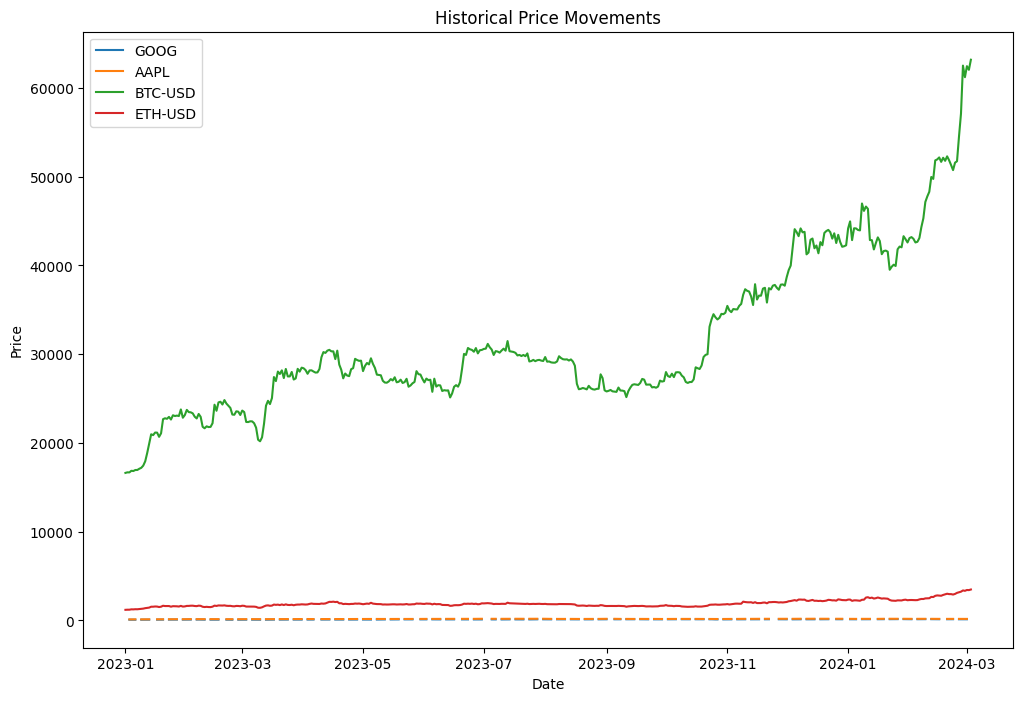

In [7]:
import matplotlib.pyplot as plt
# Visualizing the price movements of the selected assets
plt.figure(figsize=(12, 8))
for asset in assets:
    plt.plot(data['Close'][asset], label=asset)
plt.title('Historical Price Movements')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

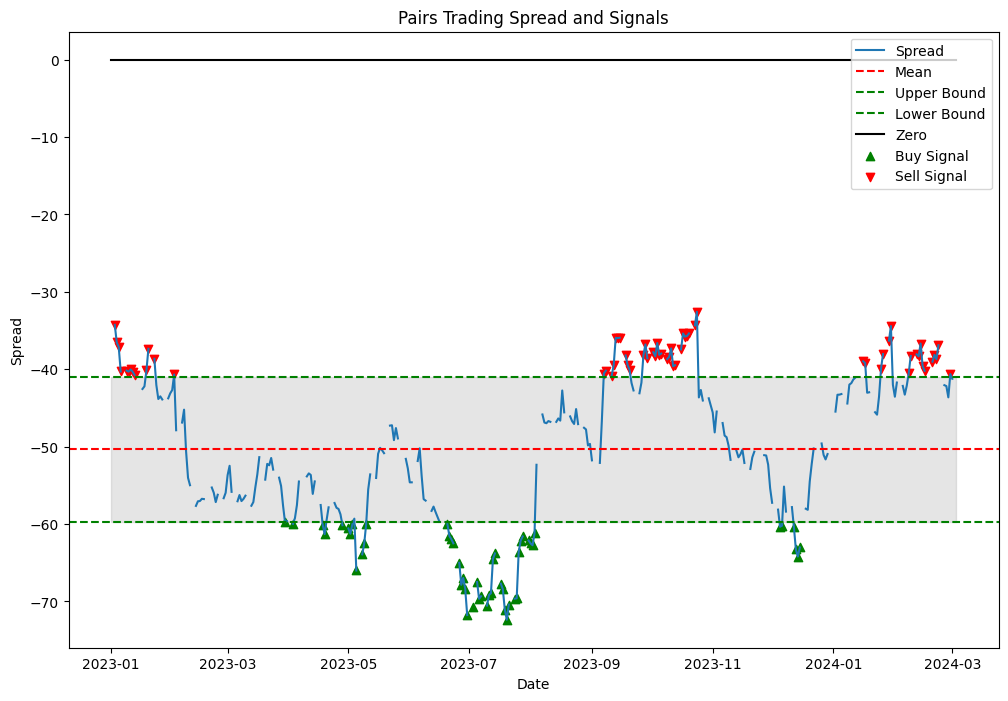

In [8]:
import numpy as np
# Implementing a simple pairs trading strategy
asset1 = 'GOOG'
asset2 = 'AAPL'
spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)
# Generating buy/sell signals based on the spread
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0
# Visualizing the spread and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

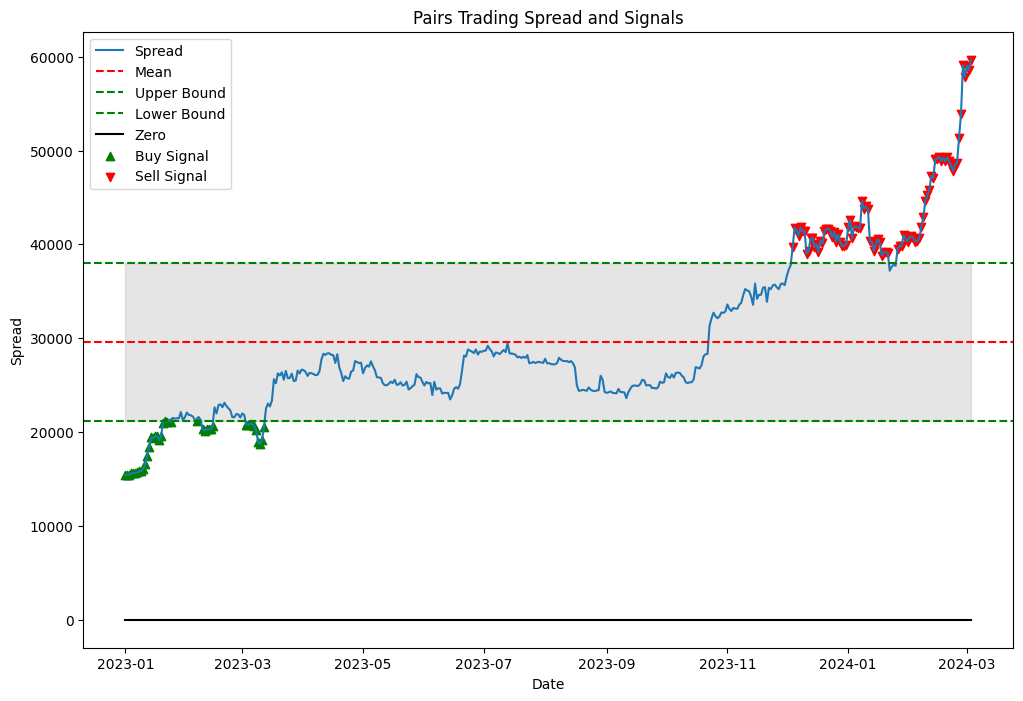

In [9]:
asset1 = 'BTC-USD'
asset2 = 'ETH-USD'
spread = data['Close'][asset1] - data['Close'][asset2]
spread_mean = np.mean(spread)
spread_std = np.std(spread)
# Generating buy/sell signals based on the spread
z_score = (spread - spread_mean) / spread_std
buy_signal = z_score < -1.0
sell_signal = z_score > 1.0
# Visualizing the spread and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='r', linestyle='--', label='Mean')
plt.axhline(spread_mean + spread_std, color='g', linestyle='--', label='Upper Bound')
plt.axhline(spread_mean - spread_std, color='g', linestyle='--', label='Lower Bound')
plt.fill_between(spread.index, spread_mean + spread_std, spread_mean - spread_std, color='gray', alpha=0.2)
plt.plot(spread.index, np.zeros(len(spread)), 'k-', label='Zero')
plt.scatter(spread[buy_signal].index, spread[buy_signal], marker='^', color='g', label='Buy Signal')
plt.scatter(spread[sell_signal].index, spread[sell_signal], marker='v', color='r', label='Sell Signal')
plt.title('Pairs Trading Spread and Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()


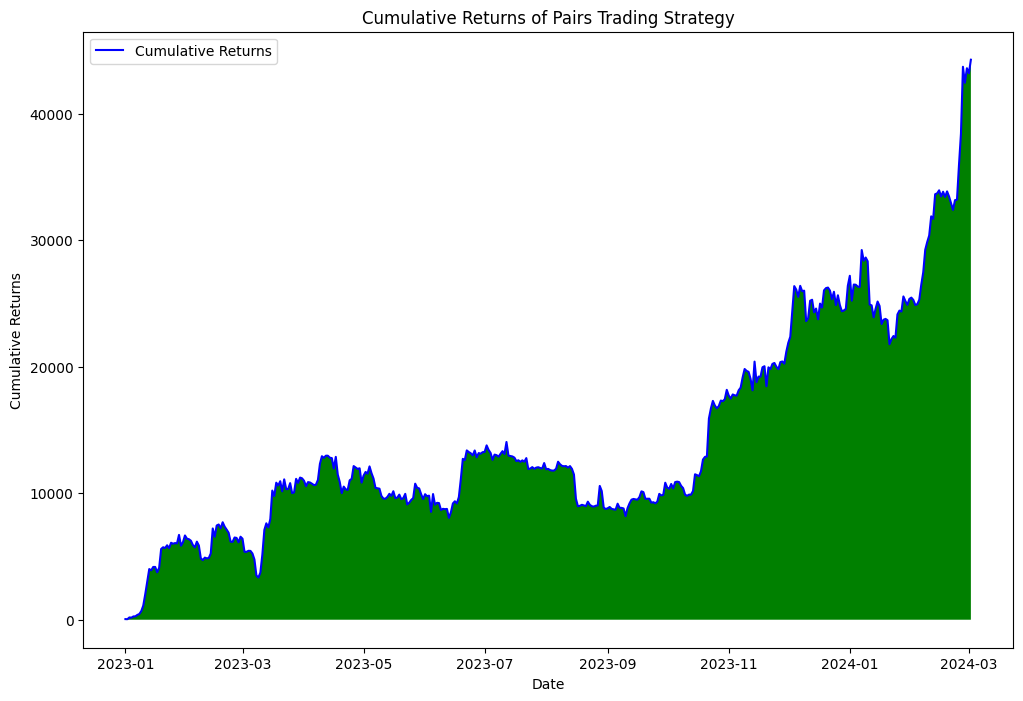

In [10]:
import matplotlib.pyplot as plt

returns = spread.shift(-1) - spread
cumulative_returns = returns.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label='Cumulative Returns', color='b')


plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns >= 0), facecolor='green')
plt.fill_between(cumulative_returns.index, 0, cumulative_returns, where=(cumulative_returns <= 0), facecolor='red')

plt.title('Cumulative Returns of Pairs Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
